<a href="https://colab.research.google.com/github/p0ggerz/mutimodal_texts_creation/blob/main/multimodal_texts_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m spacy download ru_core_news_sm
!python -m spacy download zh_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 41.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 MB 13.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('zh_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
import numpy as np

In [3]:
df = pd.read_excel('shapka.xlsx', sheet_name='Лист1', header=2)

функция для дальнейшей подписи столбцов на графиках

In [4]:
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom', fontsize=9)

переводим плюсы в единицы для подсчёта





In [5]:
df = df.replace('+', 1).fillna(0)

/tmp/ipython-input-5-2653405798.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('+', 1).fillna(0)


In [6]:
df_russian = df.iloc[:50]
df_chinese = df.iloc[50:100]

In [7]:
df_russian.head()

,№,id (числовой код),группа хэштегов,описание видео,дата публикации,локализация (домен),2.1.1 развлекательный,2.1.2 образовательный,2.1.3 новостной/политический,"2.1.4 культурный (искусство, традиции)",...,5.1.2 музыка (фоновая/лицензионная),5.1.3 звуковые эффекты,5.1.4 тишина,5.2.1 национальная музыка,5.2.2 поп-музыка/рэп и др.,5.2.3 классическая музыка,5.2.4 нет,6.1.1 преобладающая часть речи,6.1.2 преобладающие синтаксические конструкции,6.1.3 ?
0,1,6905780933396270000_6905780933396270337,Олимпиада в Токио / спорт,Отмечай друзей у кого такой тренер 🤣 Инст:kran...,2020-12-27,RU,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NOUN,0.0,0.0
1,2,6915428610555870000_6915428610555874562,русский язык / егэ,"Реки знают, что тебе пригодится😬😇 inst:lera.ma...",2021-01-08,RU,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,VERB,0.0,0.0
2,3,6968512947538780000_6968512947538775297,русский язык / егэ,"всем спасибо. я, вроде, справилась с работой, ...",2021-05-31,RU,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,PROPER NOUN,0.0,0.0
3,4,7010066237774480000_7010066237774482690,Допинг / китай,Кто хочет учиться в Китае?🙋🏻,2025-02-17,RU,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,VERB,0.0,0.0
4,5,7026720577226410000_7026720577226411269,российский гимн / любовь,"Конечно буду, тю#libertyhorse #horses#любовь #...",2021-11-04,UA,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NOUN,0.0,0.0


In [8]:
df_chinese.tail()

,№,id (числовой код),группа хэштегов,описание видео,дата публикации,локализация (домен),2.1.1 развлекательный,2.1.2 образовательный,2.1.3 новостной/политический,"2.1.4 культурный (искусство, традиции)",...,5.1.2 музыка (фоновая/лицензионная),5.1.3 звуковые эффекты,5.1.4 тишина,5.2.1 национальная музыка,5.2.2 поп-музыка/рэп и др.,5.2.3 классическая музыка,5.2.4 нет,6.1.1 преобладающая часть речи,6.1.2 преобладающие синтаксические конструкции,6.1.3 ?
95,96,e085eeccb4f7,中国文化,Chinese pinyin #中文学习\n#learnontiktok #learnlan...,2025-01-24,GB,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0
96,97,41f8a0e48f3e,政治,#福山哲郎 #京都 #参院選 #小川淳也 #立憲民主党 #ビリギャル #慶応 #受験 #政治...,2022-06-27,JP,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0
97,98,23a17ceacc7f,艺术,你知道鸑鷟是什么吗？Do you know whatYueZhuo is？#生活艺术 ＃凤凰...,2024-11-20,SG,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0.0,0.0
98,99,0a2db3c34ece,运动,夫のためにボクシングマシンを買ったんだけど、自分でもやめられないんだ！#秋\nのホテルキャン...,2024-11-18,JP,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0
99,100,61ceedc3a576,宗教,我有一個特別的感覺 \n#蔡師宏揚命理 #宏揚命理 #宗教 #道教 #玄學 #數字易經 #...,2024-06-18,TW,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0


блок 2 (общая хар-ка контента)

In [9]:
content_analysis = ['2.1.1 развлекательный', '2.1.2 образовательный',
    '2.1.3 новостной/политический', '2.1.4 культурный (искусство, традиции)',
    '2.1.5 спорт','2.2.1 индивид', '2.2.2 группа людей',
    '2.2.3 событие', '2.2.4 абстрактная идея', '2.3.1 русский культурный код', '2.3.2 китайский культурный код',
    '2.3.3 смешанный/международный', '2.4.1 развлечение', '2.4.2 информирование',
    '2.4.3 обучение', '2.4.4 провокация/дискуссия', '2.4.5 самопрезентация']
r_content_analysis = df_russian[content_analysis].sum()
ch_content_analysis = df_chinese[content_analysis].sum()
print(f"Частотность контента в русском дискурсе:\n{r_content_analysis}\n")
print(f"Частотность контента в китайском дискурсе:\n{ch_content_analysis}")

Частотность контента в русском дискурсе:
2.1.1 развлекательный                     25.0
2.1.2 образовательный                     10.0
2.1.3 новостной/политический               8.0
2.1.4 культурный (искусство, традиции)     8.0
2.1.5 спорт                                8.0
2.2.1 индивид                             28.0
2.2.2 группа людей                         3.0
2.2.3 событие                              8.0
2.2.4 абстрактная идея                    16.0
2.3.1 русский культурный код              40.0
2.3.2 китайский культурный код             0.0
2.3.3 смешанный/международный             11.0
2.4.1 развлечение                         23.0
2.4.2 информирование                      14.0
2.4.3 обучение                             6.0
2.4.4 провокация/дискуссия                 9.0
2.4.5 самопрезентация                     10.0
dtype: float64

Частотность контента в китайском дискурсе:
2.1.1 развлекательный                     27.0
2.1.2 образовательный                      6.0
2.1.3 н

корреляция спирмена 2 блок

In [10]:
spearman_corr, spearman_p = spearmanr(r_content_analysis, ch_content_analysis)

print(f"Корреляция Спирмена: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

Корреляция Спирмена: 0.115 (p-value: 0.660)


график 2 блок

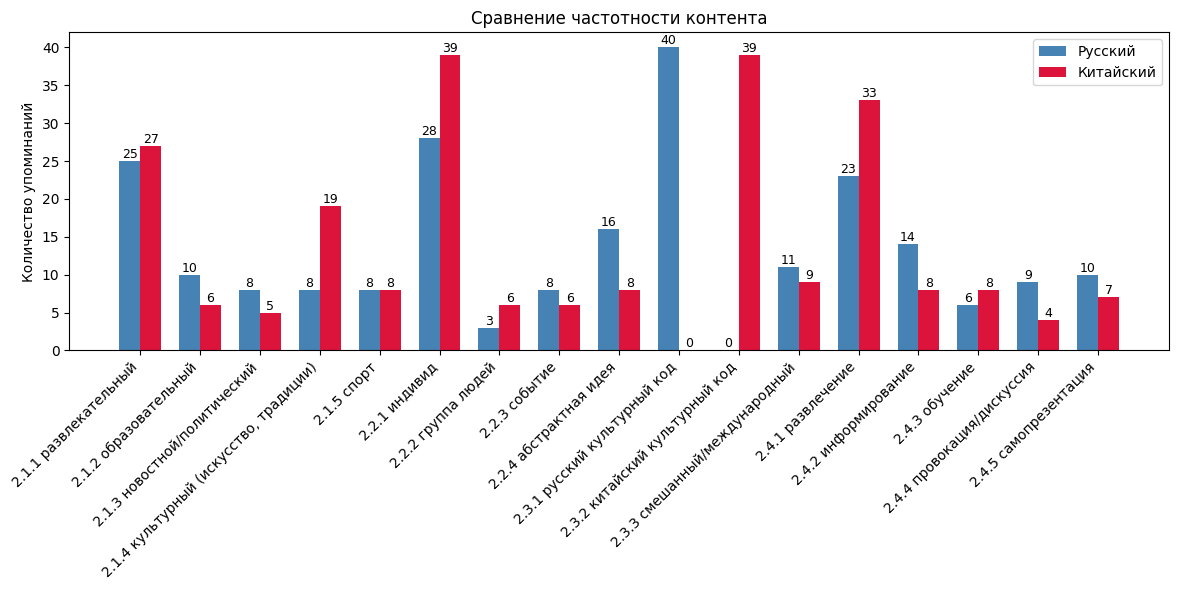

In [11]:
# Подготовка данных
categories = [x for x in content_analysis]

# Строим график
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(categories))

add_labels(plt.bar(x - width/2, r_content_analysis, width, label='Русский', color='steelblue'))
add_labels(plt.bar(x + width/2, ch_content_analysis, width, label='Китайский', color='crimson'))


plt.xticks(x, categories, rotation=45, ha='right')
plt.title('Сравнение частотности контента')
plt.ylabel('Количество упоминаний')
plt.legend()

plt.tight_layout()
plt.show()

3 блок

In [12]:
visual_analysis = ['3.1.1 оригинальное видео', '3.1.2 репортаж/иллюстрация',
    '3.1.3 клип/нарезка', '3.1.4 анимация/графика', '3.2.1 отсылки к поп-культуре',
    '3.2.2 исторические/культурные аллюзии', '3.2.3 политические аллюзии', '3.2.4 мемы', '3.3.1 символика страны', '3.3.2 традиционная одежда/архитектура', '3.3.3 современные культурные тренды']
r_visual_analysis = df_russian[visual_analysis].sum()
ch_visual_analysis = df_chinese[visual_analysis].sum()
print(f"Частотность визуальной составляющей в русском дискурсе:\n{r_visual_analysis}\n")
print(f"Частотность визуальной составляющей в китайском дискурсе:\n{ch_visual_analysis}")

Частотность визуальной составляющей в русском дискурсе:
3.1.1 оригинальное видео                 47.0
3.1.2 репортаж/иллюстрация                3.0
3.1.3 клип/нарезка                        3.0
3.1.4 анимация/графика                    0.0
3.2.1 отсылки к поп-культуре              1.0
3.2.2 исторические/культурные аллюзии    14.0
3.2.3 политические аллюзии                6.0
3.2.4 мемы                                5.0
3.3.1 символика страны                    2.0
3.3.2 традиционная одежда/архитектура     6.0
3.3.3 современные культурные тренды       6.0
dtype: float64

Частотность визуальной составляющей в китайском дискурсе:
3.1.1 оригинальное видео                 31.0
3.1.2 репортаж/иллюстрация               14.0
3.1.3 клип/нарезка                        3.0
3.1.4 анимация/графика                    2.0
3.2.1 отсылки к поп-культуре              6.0
3.2.2 исторические/культурные аллюзии    13.0
3.2.3 политические аллюзии                2.0
3.2.4 мемы                                

корреляция спирмена для 3 блока

In [13]:
spearman_corr, spearman_p = spearmanr(r_visual_analysis, ch_visual_analysis)
print(f"Корреляция Спирмена для визуальной составляющей: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

Корреляция Спирмена для визуальной составляющей: 0.577 (p-value: 0.063)


график 3 блок

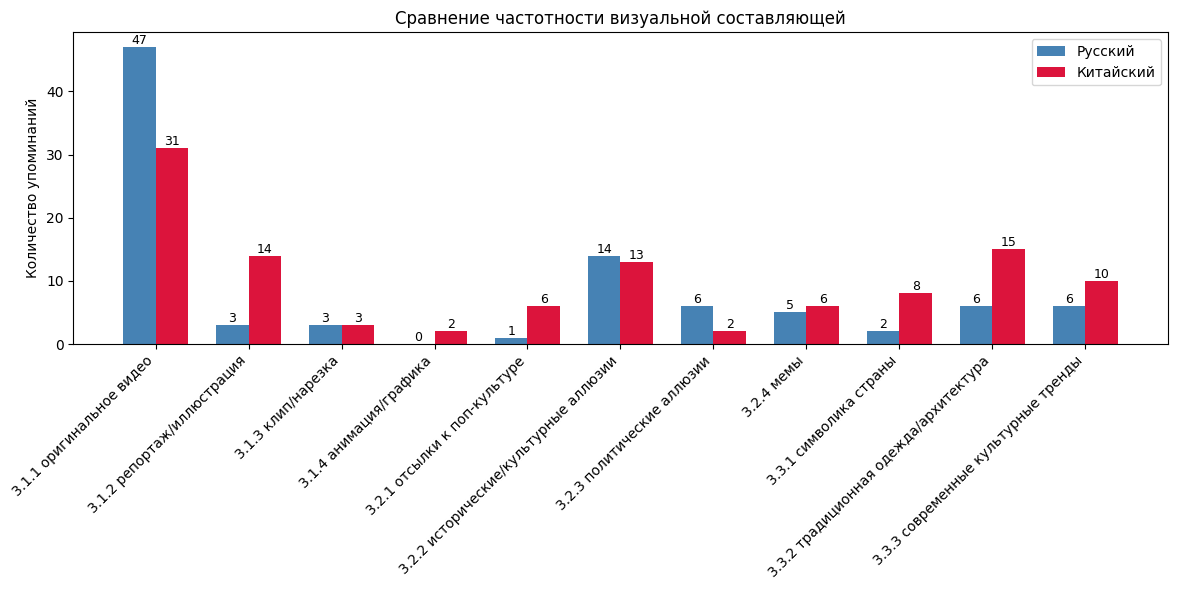

In [14]:
# Подготовка данных
categories = [x for x in visual_analysis]

# Строим график
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(categories))

add_labels(plt.bar(x - width/2, r_visual_analysis, width, label='Русский', color='steelblue'))
add_labels(plt.bar(x + width/2, ch_visual_analysis, width, label='Китайский', color='crimson'))


plt.xticks(x, categories, rotation=45, ha='right')
plt.title('Сравнение частотности визуальной составляющей')
plt.ylabel('Количество упоминаний')
plt.legend()

plt.tight_layout()
plt.show()

4 блок

In [15]:
verbal_analysis = ['4.1.1 устный', '4.1.2 письменный',
    '4.1.3 комбинированный', '4.1.4 нет текста', '4.1.5 наличие эмодзи', '4.2.1 русский',
    '4.2.2 китайский', '4.2.3 другой', '4.2.4 смешанный', '4.3.1 разговорный',
    '4.3.2 официальный', '4.3.3 поэтический/литературный','4.3.4 рекламный/призывный',
    '4.4.1 политика/юриспруденция', '4.4.2 культура/искусство', '4.4.3 спорт', '4.4.4 образование', '4.4.5 юмор']
r_verbal_analysis = df_russian[verbal_analysis].sum()
ch_verbal_analysis = df_chinese[verbal_analysis].sum()
print(f"Частотность вербальной составляющей в русском дискурсе:\n{r_verbal_analysis}\n")
print(f"Частотность вербальной составляющей в китайском дискурсе:\n{ch_verbal_analysis}")

Частотность вербальной составляющей в русском дискурсе:
4.1.1 устный                      12.0
4.1.2 письменный                   1.0
4.1.3 комбинированный             29.0
4.1.4 нет текста                   8.0
4.1.5 наличие эмодзи               5.0
4.2.1 русский                     48.0
4.2.2 китайский                    0.0
4.2.3 другой                       0.0
4.2.4 смешанный                    2.0
4.3.1 разговорный                 44.0
4.3.2 официальный                  1.0
4.3.3 поэтический/литературный     1.0
4.3.4 рекламный/призывный          7.0
4.4.1 политика/юриспруденция       8.0
4.4.2 культура/искусство          13.0
4.4.3 спорт                        8.0
4.4.4 образование                 12.0
4.4.5 юмор                        14.0
dtype: float64

Частотность вербальной составляющей в китайском дискурсе:
4.1.1 устный                       4.0
4.1.2 письменный                   7.0
4.1.3 комбинированный             23.0
4.1.4 нет текста                  16.0
4.1.5 наличи

корреляция для 4 блока

In [16]:
spearman_corr, spearman_p = spearmanr(r_verbal_analysis, ch_verbal_analysis)
print(f"Корреляция Спирмена для визуальной составляющей: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

Корреляция Спирмена для визуальной составляющей: 0.085 (p-value: 0.736)


график 4 блок

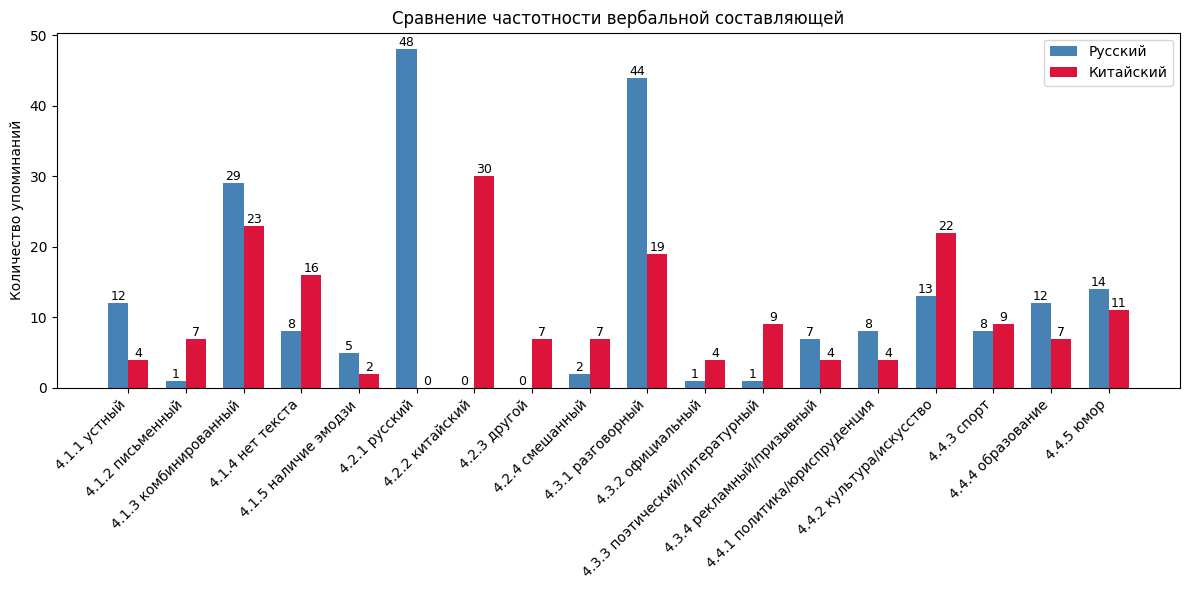

In [17]:
# Подготовка данных
categories = [x for x in verbal_analysis]

# Строим график
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(categories))

add_labels(plt.bar(x - width/2, r_verbal_analysis, width, label='Русский', color='steelblue'))
add_labels(plt.bar(x + width/2, ch_verbal_analysis, width, label='Китайский', color='crimson'))


plt.xticks(x, categories, rotation=45, ha='right')
plt.title('Сравнение частотности вербальной составляющей')
plt.ylabel('Количество упоминаний')
plt.legend()

plt.tight_layout()
plt.show()

5 блок частотность

In [18]:
audio_analysis = ['5.1.1 речь автора', '5.1.2 музыка (фоновая/лицензионная)',
    '5.1.3 звуковые эффекты', '5.1.4 тишина', '5.2.1 национальная музыка', '5.2.2 поп-музыка/рэп и др.',
    '5.2.3 классическая музыка', '5.2.4 нет']
r_audio_analysis = df_russian[audio_analysis].sum()
ch_audio_analysis = df_chinese[audio_analysis].sum()
print(f"Частотность аудио составляющей в русском дискурсе:\n{r_audio_analysis}\n")
print(f"Частотность аудио составляющей в китайском дискурсе:\n{ch_audio_analysis}")

Частотность аудио составляющей в русском дискурсе:
5.1.1 речь автора                      41.0
5.1.2 музыка (фоновая/лицензионная)    24.0
5.1.3 звуковые эффекты                  0.0
5.1.4 тишина                            1.0
5.2.1 национальная музыка               0.0
5.2.2 поп-музыка/рэп и др.             23.0
5.2.3 классическая музыка               3.0
5.2.4 нет                              25.0
dtype: float64

Частотность аудио составляющей в китайском дискурсе:
5.1.1 речь автора                      22.0
5.1.2 музыка (фоновая/лицензионная)    35.0
5.1.3 звуковые эффекты                  7.0
5.1.4 тишина                            1.0
5.2.1 национальная музыка              15.0
5.2.2 поп-музыка/рэп и др.             17.0
5.2.3 классическая музыка               4.0
5.2.4 нет                              15.0
dtype: float64


корреляция спирмена 5 блок

In [19]:
spearman_corr, spearman_p = spearmanr(r_audio_analysis, ch_audio_analysis)
print(f"Корреляция Спирмена для аудио составляющей: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

Корреляция Спирмена для аудио составляющей: 0.620 (p-value: 0.101)


график 5 блок

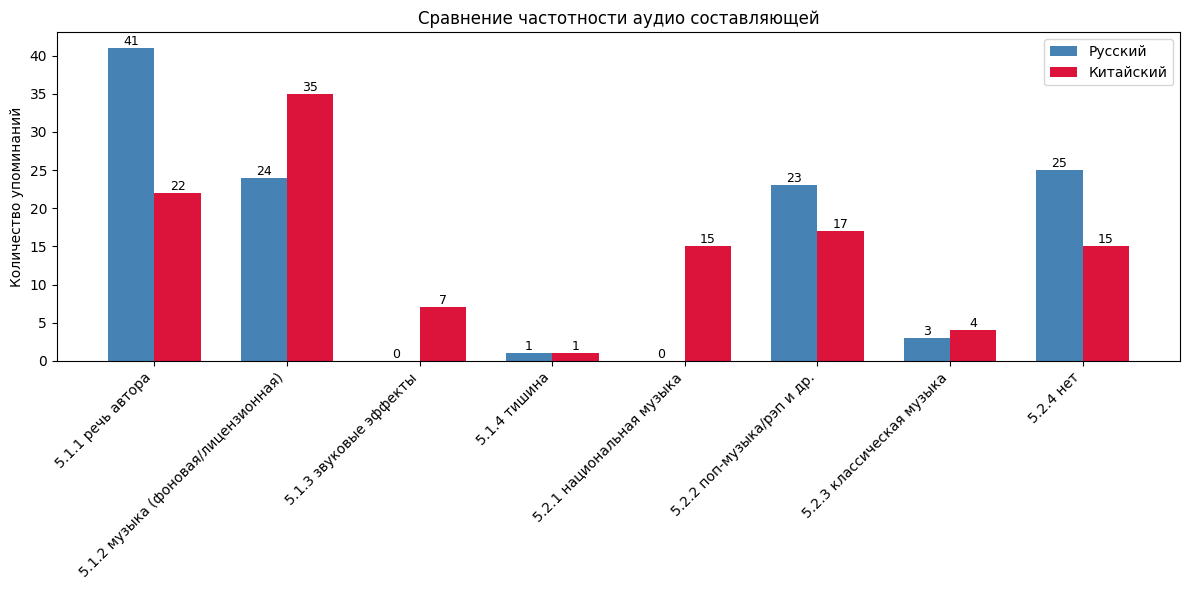

In [20]:
# Подготовка данных
categories = [x for x in audio_analysis]

# Строим график
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(categories))

add_labels(plt.bar(x - width/2, r_audio_analysis, width, label='Русский', color='steelblue'))
add_labels(plt.bar(x + width/2, ch_audio_analysis, width, label='Китайский', color='crimson'))


plt.xticks(x, categories, rotation=45, ha='right')
plt.title('Сравнение частотности аудио составляющей')
plt.ylabel('Количество упоминаний')
plt.legend()

plt.tight_layout()
plt.show()

графики для каждого блока с линией тренда

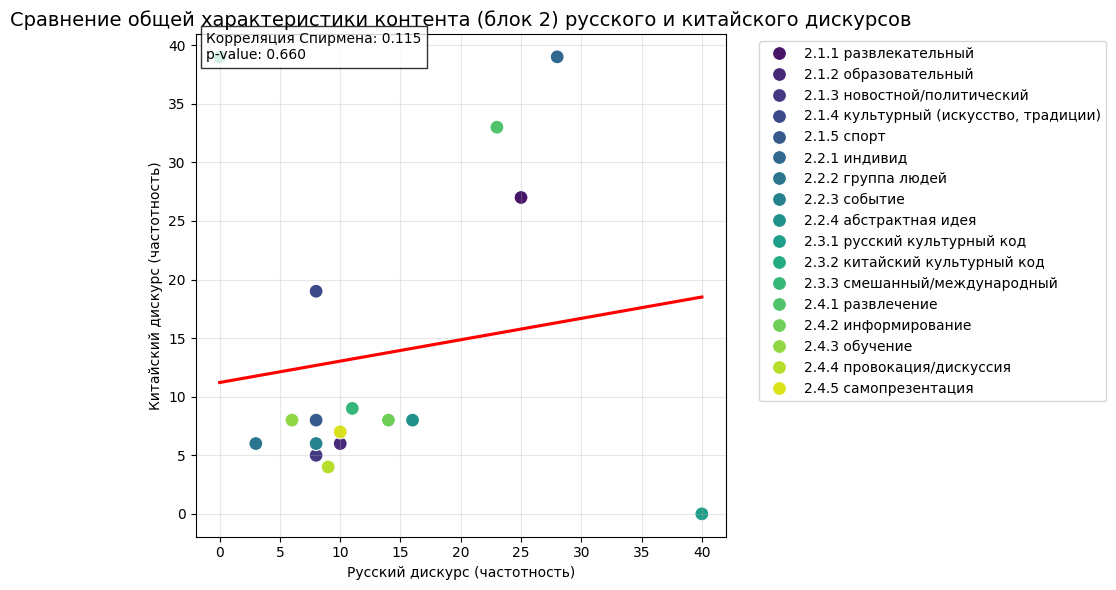

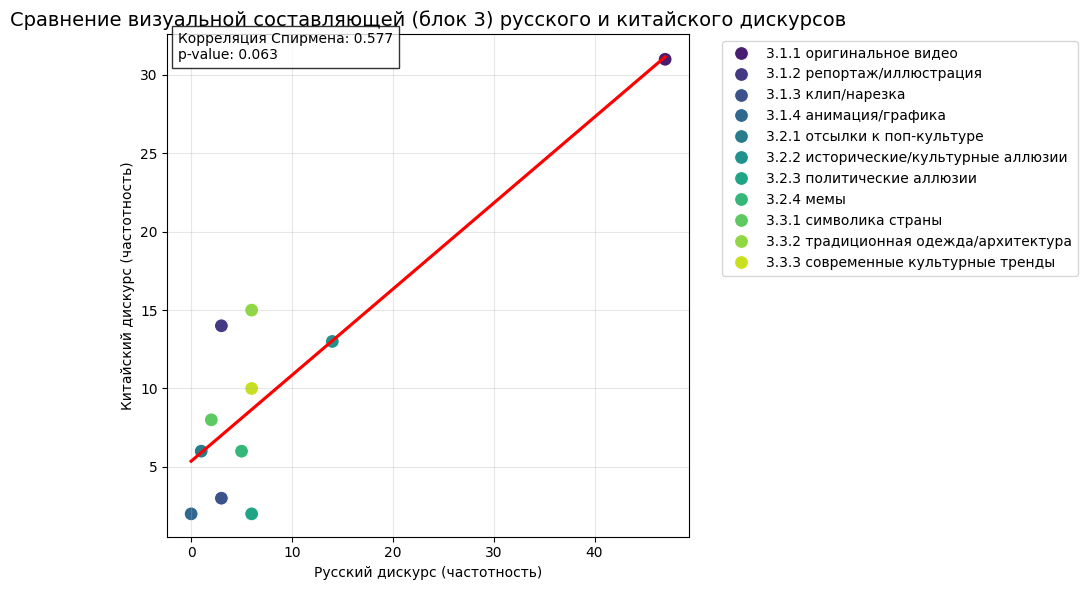

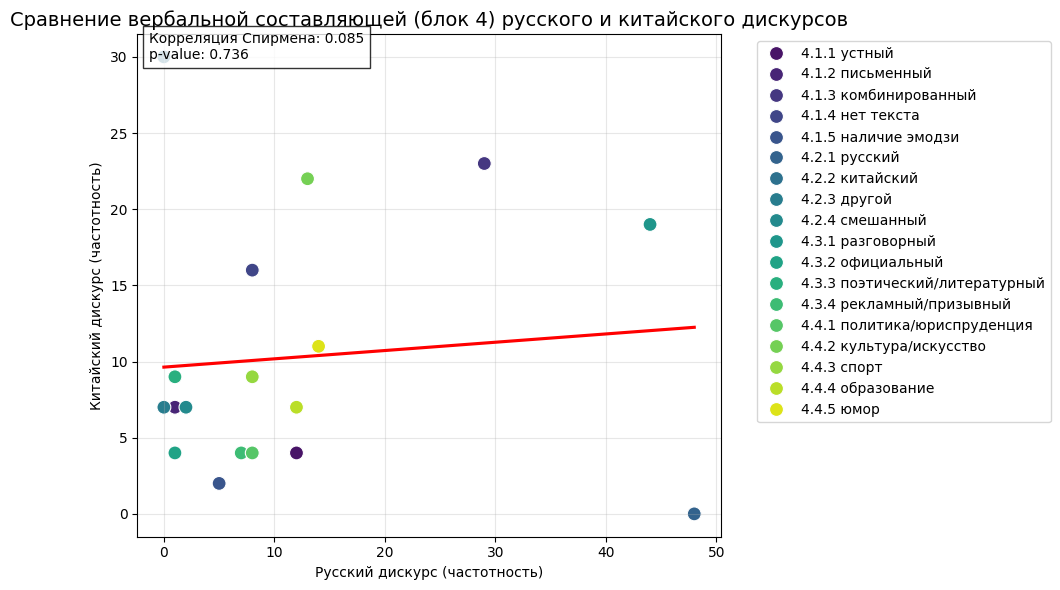

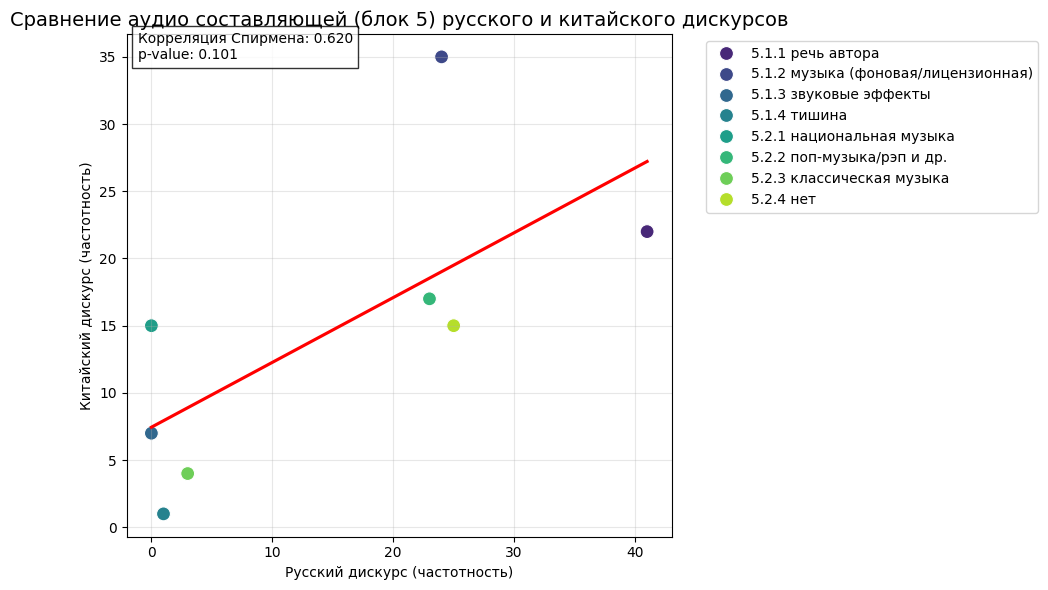

In [21]:
# Функция для создания scatter plot по блоку
def plot_block_scatter(russian_data, chinese_data, features, block_name):
    df_block = pd.DataFrame({
        'feature': features,
        'russian': russian_data,
        'chinese': chinese_data
    })

    # Считаем корреляцию
    corr, p_value = spearmanr(russian_data, chinese_data)

    # Строим график
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_block, x='russian', y='chinese', hue='feature', s=100, palette='viridis')

    # Добавляем линию тренда
    sns.regplot(x='russian', y='chinese', data=df_block,
                scatter=False, color='red', ci=None)

    plt.title(f'Сравнение {block_name} русского и китайского дискурсов', fontsize=14)
    plt.xlabel('Русский дискурс (частотность)')
    plt.ylabel('Китайский дискурс (частотность)')
    plt.grid(alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Аннотация корреляции
    plt.text(0.02, 0.95,
             f"Корреляция Спирмена: {corr:.3f}\np-value: {p_value:.3f}",
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Графики для каждого блока:

# Блок 2 - Общая характеристика контента
plot_block_scatter(r_content_analysis, ch_content_analysis, content_analysis,
                  "общей характеристики контента (блок 2)")

# Блок 3 - Визуальная составляющая
plot_block_scatter(r_visual_analysis, ch_visual_analysis, visual_analysis,
                  "визуальной составляющей (блок 3)")

# Блок 4 - Вербальная составляющая
plot_block_scatter(r_verbal_analysis, ch_verbal_analysis, verbal_analysis,
                  "вербальной составляющей (блок 4)")

# Блок 5 - Аудио составляющая
plot_block_scatter(r_audio_analysis, ch_audio_analysis, audio_analysis,
                  "аудио составляющей (блок 5)")

объединение всех блоков

In [22]:
russian_all = pd.concat([
    r_content_analysis.rename('content'),
    r_visual_analysis.rename('visual'),
    r_verbal_analysis.rename('verbal'),
    r_audio_analysis.rename('audio')
])

chinese_all = pd.concat([
    ch_content_analysis.rename('content'),
    ch_visual_analysis.rename('visual'),
    ch_verbal_analysis.rename('verbal'),
    ch_audio_analysis.rename('audio')
])

df_combined_all = pd.DataFrame({
    'feature': russian_all.index,
    'russian': russian_all.values,
    'chinese': chinese_all.values
})

общая корреляция

In [23]:
spearman_corr, spearman_p = spearmanr(df_combined_all['russian'], df_combined_all['chinese'])
print(f"Общая корреляция Спирмена по всем блокам (2-5): {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

Общая корреляция Спирмена по всем блокам (2-5): 0.308 (p-value: 0.023)


график (общий)

/tmp/ipython-input-24-987876857.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


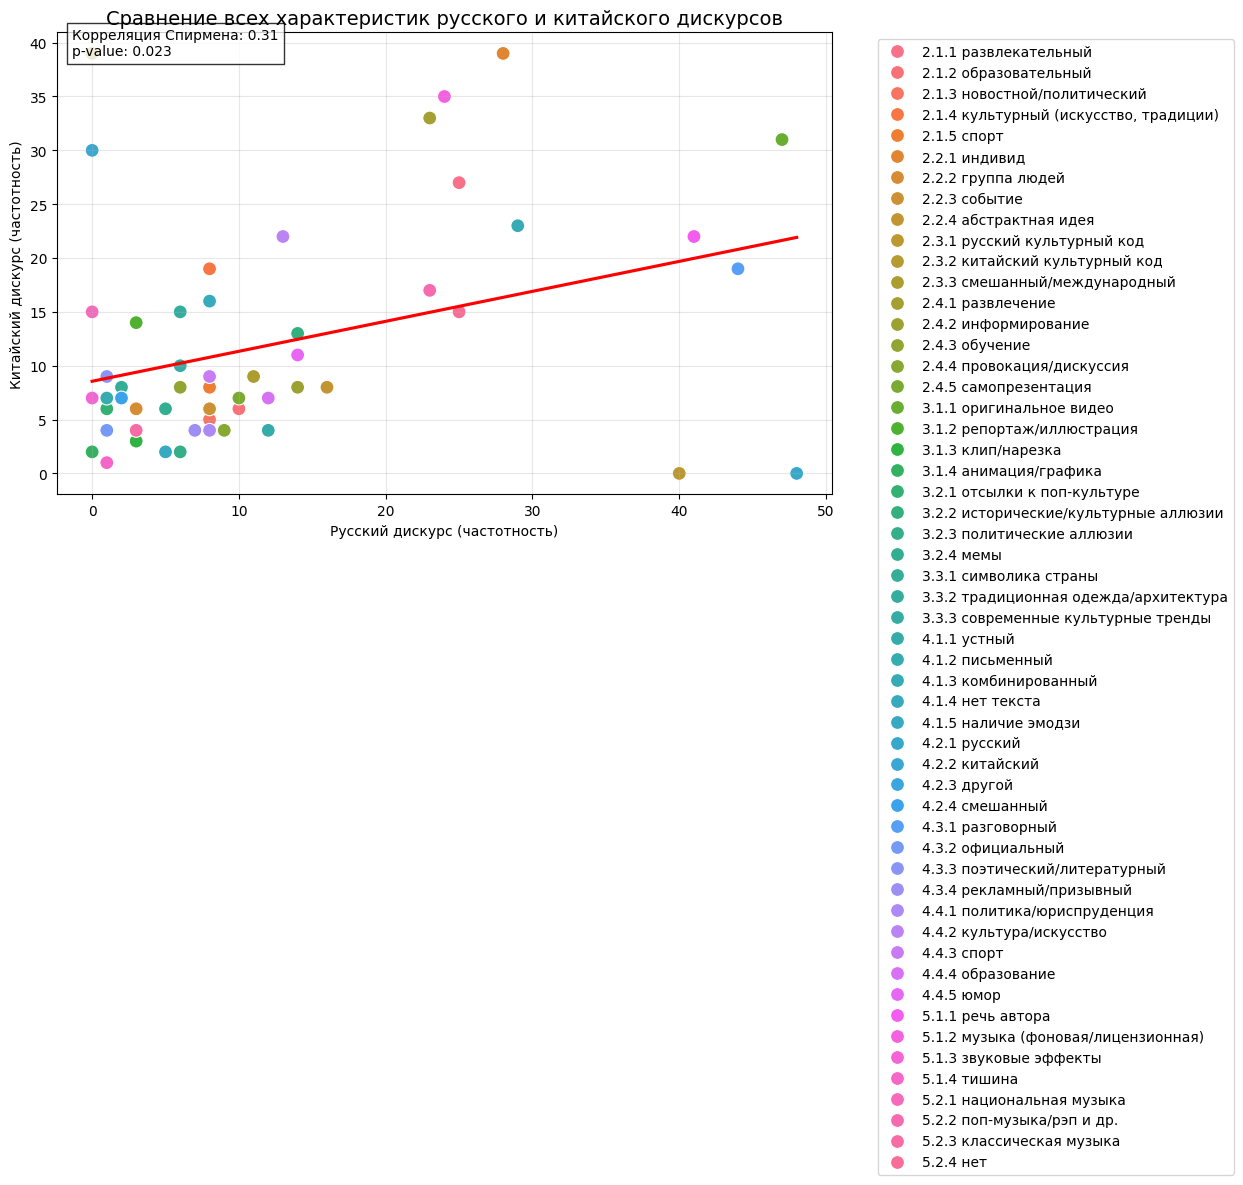

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined_all, x='russian', y='chinese', hue='feature', s=100)

sns.regplot(data=df_combined_all, x='russian', y='chinese',
           scatter=False, color='red', ci=None)

plt.title('Сравнение всех характеристик русского и китайского дискурсов', fontsize=14)
plt.xlabel('Русский дискурс (частотность)')
plt.ylabel('Китайский дискурс (частотность)')
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавляем аннотацию с корреляцией
plt.text(0.02, 0.95,
         f"Корреляция Спирмена: {spearman_corr:.2f}\np-value: {spearman_p:.3f}",
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

проверка на ложно-положительную корреляцию

In [25]:
def check_spurious_correlation(r_original, ch_original, block_name, alpha=0.05):
    """
    Проверяет ложноположительную корреляцию с контролем временного фактора

    Параметры:
    r_original - российские данные (уже агрегированные)
    ch_original - китайские данные (уже агрегированные)
    block_name - название блока для вывода
    alpha - уровень значимости
    """
    # Условный фактор времени (порядок наблюдений)
    time_factor = np.arange(len(r_original))

    # 1. Частная корреляция Спирмена с контролем времени
    r_rank = stats.rankdata(r_original)
    ch_rank = stats.rankdata(ch_original)
    time_rank = stats.rankdata(time_factor)

    # Удаляем влияние времени
    resid_r = r_rank - np.polyval(np.polyfit(time_rank, r_rank, 1), time_rank)
    resid_ch = ch_rank - np.polyval(np.polyfit(time_rank, ch_rank, 1), time_rank)

    # Корреляция между остатками
    partial_corr, partial_p = stats.spearmanr(resid_r, resid_ch)

    # 2. Получаем оригинальную корреляцию (уже рассчитана)
    original_corr, original_p = stats.spearmanr(r_original, ch_original)

    # 3. Проверка на ложноположительность
    is_spurious = (original_p < alpha) and (partial_p >= alpha)

    # Вывод результатов
    print(f"Проверка ложноположительной корреляции для блока: {block_name}")
    print(f"Оригинальная корреляция: r = {original_corr:.3f}, p = {original_p:.4f}")
    print(f"Частная корреляция (контроль времени): r = {partial_corr:.3f}, p = {partial_p:.4f}")

    if is_spurious:
        print("Вывод: Обнаружена ложноположительная корреляция!")
        print("Первоначальная связь объясняется временным трендом.")
    elif partial_p < alpha:
        print("Вывод: Корреляция значима и не является ложной")
    else:
        print("Вывод: Нет значимой корреляции")


# Применяем ко всем блокам
check_spurious_correlation(r_content_analysis, ch_content_analysis, "Блок 2: Общая характеристика контента")
check_spurious_correlation(r_visual_analysis, ch_visual_analysis, "Блок 3: Визуальная составляющая")
check_spurious_correlation(r_verbal_analysis, ch_verbal_analysis, "Блок 4: Вербальная составляющая")
check_spurious_correlation(r_audio_analysis, ch_audio_analysis, "Блок 5: Аудио составляющая")

Проверка ложноположительной корреляции для блока: Блок 2: Общая характеристика контента
Оригинальная корреляция: r = 0.115, p = 0.6598
Частная корреляция (контроль времени): r = 0.083, p = 0.7505
Вывод: Нет значимой корреляции
Проверка ложноположительной корреляции для блока: Блок 3: Визуальная составляющая
Оригинальная корреляция: r = 0.577, p = 0.0629
Частная корреляция (контроль времени): r = 0.600, p = 0.0510
Вывод: Нет значимой корреляции
Проверка ложноположительной корреляции для блока: Блок 4: Вербальная составляющая
Оригинальная корреляция: r = 0.085, p = 0.7359
Частная корреляция (контроль времени): r = 0.036, p = 0.8869
Вывод: Нет значимой корреляции
Проверка ложноположительной корреляции для блока: Блок 5: Аудио составляющая
Оригинальная корреляция: r = 0.620, p = 0.1007
Частная корреляция (контроль времени): r = 0.667, p = 0.0710
Вывод: Нет значимой корреляции


функция для подсчета критерия манна-уитни

In [26]:
def calculate_mannwhitney(df_russian, df_chinese, features, block_name):
    print(f"Критерий Манна-Уитни для блока: {block_name}")

    for feature in features:
        rus_data = df_russian[feature]
        ch_data = df_chinese[feature]

        stat, p_value = mannwhitneyu(rus_data, ch_data, alternative='two-sided')

        if p_value < 0.05:
            significance = "Различия значимы (p < 0.05)"
        else:
            significance = "Различия незначимы (p ≥ 0.05)"

        print(f"\nПризнак: {feature}")
        print(f"U-статистика = {stat:.3f}, p-value = {p_value:.6f}")
        print(f"Вывод: {significance}")

критерий манна-уитни (2 блок)

In [27]:
calculate_mannwhitney(df_russian, df_chinese, content_analysis, "2. Общая характеристика контента")

Критерий Манна-Уитни для блока: 2. Общая характеристика контента

Признак: 2.1.1 развлекательный
U-статистика = 1200.000, p-value = 0.693337
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 2.1.2 образовательный
U-статистика = 1350.000, p-value = 0.280057
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 2.1.3 новостной/политический
U-статистика = 1325.000, p-value = 0.377959
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 2.1.4 культурный (искусство, традиции)
U-статистика = 975.000, p-value = 0.013863
Вывод: Различия значимы (p < 0.05)

Признак: 2.1.5 спорт
U-статистика = 1250.000, p-value = 1.000000
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 2.2.1 индивид
U-статистика = 975.000, p-value = 0.020157
Вывод: Различия значимы (p < 0.05)

Признак: 2.2.2 группа людей
U-статистика = 1175.000, p-value = 0.300166
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 2.2.3 событие
U-статистика = 1300.000, p-value = 0.570194
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 2.2.4 абстрактная идея
U-статист

критерий манна-уитни (3 блок)

In [28]:
calculate_mannwhitney(df_russian, df_chinese, visual_analysis, "3. Визуальная составляющая")

Критерий Манна-Уитни для блока: 3. Визуальная составляющая

Признак: 3.1.1 оригинальное видео
U-статистика = 1650.000, p-value = 0.000124
Вывод: Различия значимы (p < 0.05)

Признак: 3.1.2 репортаж/иллюстрация
U-статистика = 975.000, p-value = 0.003633
Вывод: Различия значимы (p < 0.05)

Признак: 3.1.3 клип/нарезка
U-статистика = 1250.000, p-value = 1.000000
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 3.1.4 анимация/графика
U-статистика = 1200.000, p-value = 0.159369
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 3.2.1 отсылки к поп-культуре
U-статистика = 1125.000, p-value = 0.052133
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 3.2.2 исторические/культурные аллюзии
U-статистика = 1275.000, p-value = 0.826156
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 3.2.3 политические аллюзии
U-статистика = 1350.000, p-value = 0.144374
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 3.2.4 мемы
U-статистика = 1225.000, p-value = 0.755315
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 3.3.1 сим

критерий манна-уитни (4 блок)

In [29]:
calculate_mannwhitney(df_russian, df_chinese, verbal_analysis, "4. Вербальная составляющая")

Критерий Манна-Уитни для блока: 4. Вербальная составляющая

Признак: 4.1.1 устный
U-статистика = 1450.000, p-value = 0.030326
Вывод: Различия значимы (p < 0.05)

Признак: 4.1.2 письменный
U-статистика = 1100.000, p-value = 0.028292
Вывод: Различия значимы (p < 0.05)

Признак: 4.1.3 комбинированный
U-статистика = 1400.000, p-value = 0.233670
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 4.1.4 нет текста
U-статистика = 1050.000, p-value = 0.063010
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 4.1.5 наличие эмодзи
U-статистика = 1325.000, p-value = 0.245195
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 4.2.1 русский
U-статистика = 2450.000, p-value = 0.000000
Вывод: Различия значимы (p < 0.05)

Признак: 4.2.2 китайский
U-статистика = 500.000, p-value = 0.000000
Вывод: Различия значимы (p < 0.05)

Признак: 4.2.3 другой
U-статистика = 1075.000, p-value = 0.006490
Вывод: Различия значимы (p < 0.05)

Признак: 4.2.4 смешанный
U-статистика = 1125.000, p-value = 0.083375
Вывод: Различия незна

критерий манна-уитни (5 блок)

In [30]:
calculate_mannwhitney(df_russian, df_chinese, audio_analysis, "5. Аудио составляющая")

Критерий Манна-Уитни для блока: 5. Аудио составляющая

Признак: 5.1.1 речь автора
U-статистика = 1725.000, p-value = 0.000092
Вывод: Различия значимы (p < 0.05)

Признак: 5.1.2 музыка (фоновая/лицензионная)
U-статистика = 975.000, p-value = 0.026332
Вывод: Различия значимы (p < 0.05)

Признак: 5.1.3 звуковые эффекты
U-статистика = 1075.000, p-value = 0.006490
Вывод: Различия значимы (p < 0.05)

Признак: 5.1.4 тишина
U-статистика = 1250.000, p-value = 1.000000
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 5.2.1 национальная музыка
U-статистика = 875.000, p-value = 0.000030
Вывод: Различия значимы (p < 0.05)

Признак: 5.2.2 поп-музыка/рэп и др.
U-статистика = 1400.000, p-value = 0.224540
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 5.2.3 классическая музыка
U-статистика = 1225.000, p-value = 0.702338
Вывод: Различия незначимы (p ≥ 0.05)

Признак: 5.2.4 нет
U-статистика = 1500.000, p-value = 0.042668
Вывод: Различия значимы (p < 0.05)


морфологическа разметка (русский язык)

In [31]:
nlp = spacy.load('ru_core_news_sm')

with open('description_ru.txt', encoding='utf-8') as f:
    text = f.read()

# Tokenization with filtering
doc = nlp(text)
filtered_tokens = [token for token in doc if token.is_alpha and not token.is_stop and not token.ent_type_]

# Lemmatization
print('Lemmatization')
print('-' * 50)
lemmas = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
print(f"{'Исходное слово':<25} {'Лемма':<25}")

for token in doc:
    if token.is_alpha and not token.is_stop:
        print(f"{token.text:<25} {token.lemma_:<25}")
print()

# POS tagging
print('Part-of-speech tagging')
print('-' * 50)
print(f"{'Токен':<25} {'POS':<8} {'Описание':<40}")
for token in doc:
    if token.is_alpha and not token.is_stop:
        print(f"{token.text:<25} {token.pos_:<8} {spacy.explain(token.pos_):<40}")
print()


Lemmatization
--------------------------------------------------
Исходное слово            Лемма                    
друзей                    друг                     
тренер                    тренер                   
Инст                      инст                     
мма                       мма                      
рукопашныйбой             рукопашныйбой            
карате                    карате                   
кикбоксинг                кикбоксинг               
тайскийбокс               тайскийбокс              
спорт                     спорт                    
kranmma                   kranmma                  
тренер                    тренер                   
Реки                      река                     
знают                     знать                    
пригодится                пригодиться              
inst                      inst                     
егэ                       егэ                      
узнайсегодня              узнайсегодня             

морфологическая разметка (китайский язык)

In [36]:
nlp = spacy.load('zh_core_web_sm')

with open('description_zh.txt', encoding='utf-8') as f:
    text = f.read()

# Tokenization with filtering
doc = nlp(text)
filtered_tokens = [token for token in doc if token.is_alpha and not token.is_stop and not token.ent_type_]

# POS tagging
print('Part-of-speech tagging')
print('-' * 50)
print(f"{'Токен':<25} {'POS':<8} {'Описание':<40}")
for token in doc:
    if token.is_alpha and not token.is_stop:
        print(f"{token.text:<25} {token.pos_:<8} {spacy.explain(token.pos_):<40}")
print()

Part-of-speech tagging
--------------------------------------------------
Токен                     POS      Описание                                
高考                        PROPN    proper noun                             
干呕哥                       NOUN     noun                                    
笑                         VERB     verb                                    
肚子                        NOUN     noun                                    
疼                         VERB     verb                                    
硬是                        NOUN     noun                                    
孩子                        NOUN     noun                                    
用安                        NOUN     noun                                    
卓錯                        NOUN     noun                                    
嗎                         VERB     verb                                    
搞笑                        VERB     verb                                    
短劇            

график для морфологической разметки

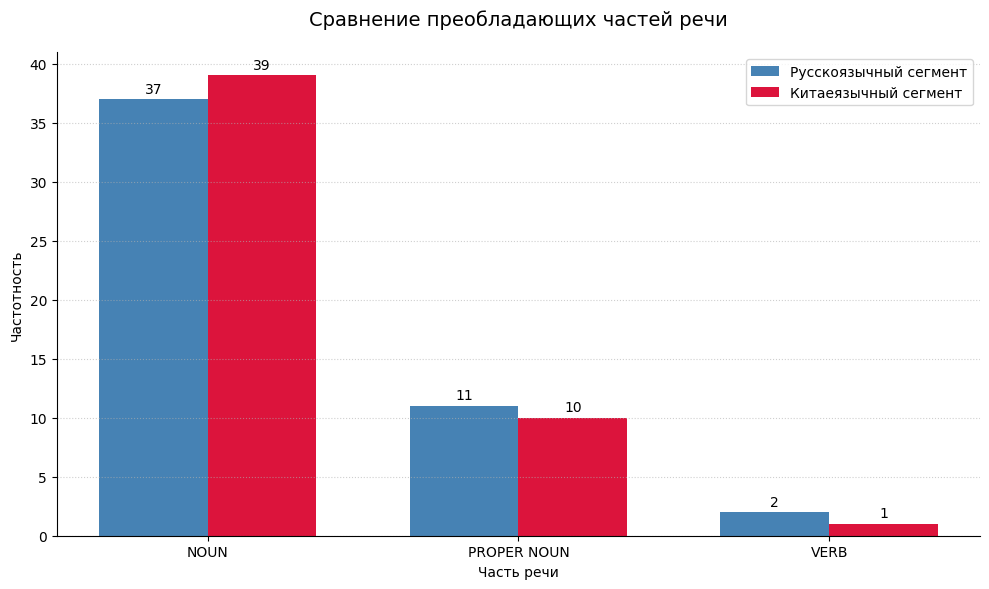

In [60]:
ru_data = {'Часть речи': ['NOUN', 'PROPER NOUN', 'VERB'], 'Count': [37, 11, 2]}
zh_data = {'Часть речи': ['NOUN', 'PROPER NOUN', 'VERB'],'Count': [39, 10, 1]}

# создание графика
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(ru_data['Часть речи']))
width = 0.35

bars_ru = ax.bar(x - width/2, ru_data['Count'], width, label='Русскоязычный сегмент', color='steelblue')
bars_zh = ax.bar(x + width/2, zh_data['Count'], width, label='Китаеязычный сегмент', color='crimson')

# подписи данных
for bars in [bars_ru, bars_zh]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.3,
                f'{height}', ha='center', va='bottom')

# оформление
ax.set_title('Сравнение преобладающих частей речи', pad=20, fontsize=14)
ax.set_xlabel('Часть речи')
ax.set_ylabel('Частотность')
ax.set_xticks(x)
ax.set_xticklabels(ru_data['Часть речи'])
ax.legend(fontsize=10)

# доп улучшения
ax.grid(axis='y', linestyle=':', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

график для синтаксической разметки

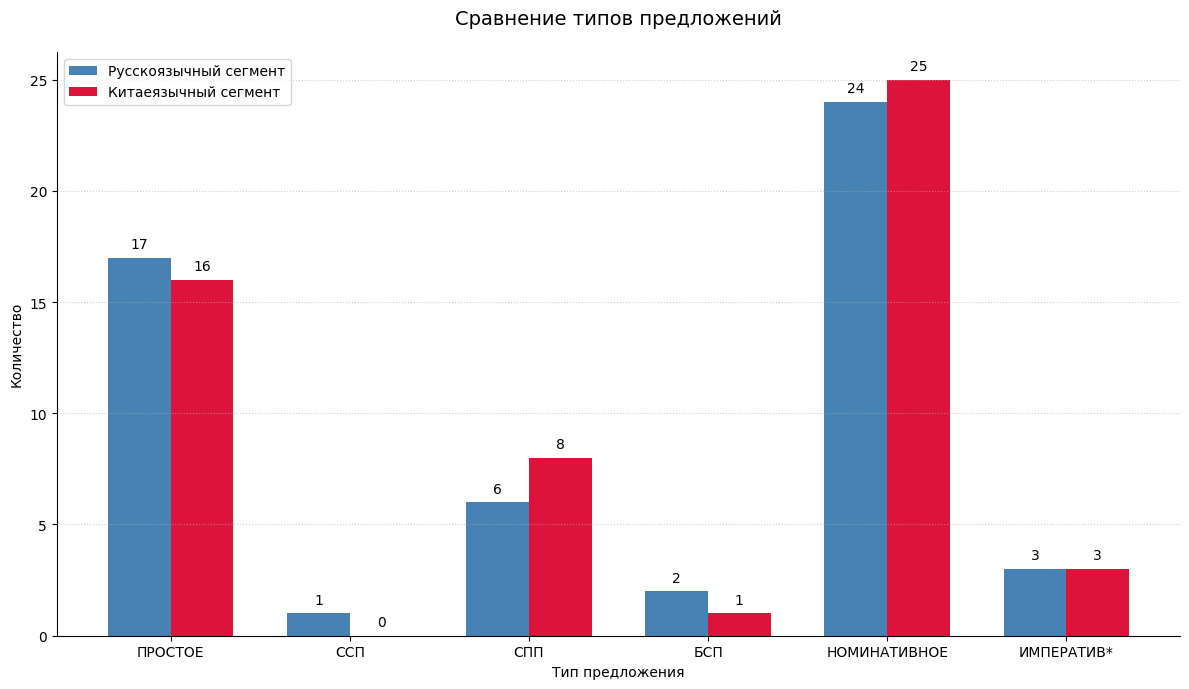

In [67]:
data = {'ТИП ПРЕДЛОЖЕНИЯ': ['ПРОСТОЕ', 'ССП', 'СПП', 'БСП', 'НОМИНАТИВНОЕ', 'ИМПЕРАТИВ*'],
    'RU': [17, 1, 6, 2, 24, 3],
    'ZH': [16, 0, 8, 1, 25, 3]}

# создание графика
fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(data['ТИП ПРЕДЛОЖЕНИЯ']))
width = 0.35

bars_ru = ax.bar(x - width/2, data['RU'], width, label='Русскоязычный сегмент', color='steelblue')
bars_zh = ax.bar(x + width/2, data['ZH'], width, label='Китаеязычный сегмент', color='crimson')

# подписи данных
for bars in [bars_ru, bars_zh]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.3,
                f'{height}', ha='center', va='bottom')

# оформление
ax.set_title('Сравнение типов предложений', pad=20, fontsize=14)
ax.set_ylabel('Количество')
ax.set_xlabel('Тип предложения')
ax.set_xticks(x)
ax.set_xticklabels(data['ТИП ПРЕДЛОЖЕНИЯ'], fontsize=10)
ax.legend(fontsize=10)

# доп улучшения
ax.grid(axis='y', linestyle=':', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()